# Exploring Your Dataset for Machine Learning

With all analysis, machine learning or not, it's best to start by getting to grips with your dataset. In this notebook we will demonstrate how to use Python to visualise and characterise the dataset.

## Key objectives
- Load, explore and visualise the dataset
- Apply basic quality criteria, like checks for missing values
- Check for class imbalance
- Calculate correlations between variables

## 1. Introducing the Indian Liver Patient Dataset

### Information from Kaggle

This dataset contains 416 liver patient records and 167 non-liver-patient records.The dataset was collected from test samples in North East of Andhra Pradesh, India. 

'is_patient' is a binary class label used to divide patients into two groups: liver patient or not. This dataset contains:

- 441 male patient records 
- 142 female patient records.

**Note**: Any patient whose age exceeded 89 is listed as being of age "90".

[Indian Liver Patient Dataset](https://www.kaggle.com/datasets/jeevannagaraj/indian-liver-patient-dataset)

## 2. Setting Up Our Environment

Now that we understand the origins of our dataset, let's explore it. 

For this we will be using a combination of widely-used data science packages in Python. Here is a brief description of each:

- **Pandas**: A powerful data manipulation library that provides its own DataFrame structures ideal for working with labelled, tabular data

- **NumPy**: A fundamental package for numerical computing in Python, providing support for arrays and a plethora of mathematical functions

- **Matplotlib**: A comprehensive plotting library capable of creating static, animated and interactive visualisations

- **Seaborn**: A statistical data visualisation library that builds on matplotlib and provides a high-level interface for drawing attractive statistical graphs

- **scikit-learn**: A popular Python machine learning library that provides simple and efficient tools for data analysis and modelling

Using a combination of these tools, we should be able to load, manipulate and visualise our data powerfully, and effectively.

In [1]:
# Import our packages, giving some shorter aliases to make typing easier
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

# Set visualisation style for consistency
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 3. Loading and Initial Inspection

The first thing we want to do is to check that the data we have are as we expect. We can do the following:

- Check how many rows (**samples**) and columns (**features**) we have
- Take a sneak-peak at the actual data
- See what types we have in each column

In [2]:
# Load the dataset
df = pd.read_csv("../data/indian_liver_patient.csv") # Read in the CSV file as a Pandas DataFrame

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}") # Returns a tuple of the number of rows and columns.
print(f"Number of samples: {df.shape[0]}") # Number of rows
print(f"Number of features: {df.shape[1]}") # Number of columns

Dataset shape: (583, 11)
Number of samples: 583
Number of features: 11


In [3]:
# Display first five rows to understand the structure:
df.head() #

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Check data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


It looks like the DataFrame is all numeric, with features that are *floats*, and a binary diagnosis column with values of either 0 or 1, which represent our labels (the outcome of a diagnosis, and what we are hoping to predict in this practical). 

We can confirm if this is all true, by counting the values of the DataFrame's `dtypes`, as follows:

In [5]:
# Check for how many unique data types are present in the DataFrame
df.dtypes.value_counts()

int64      5
float64    5
object     1
Name: count, dtype: int64

## 4a. Data Quality Checks

Data quality is crucial. In this example, we are lucky enough to be using a well-prepared, clean dataset; but with real-world problems, this is often not the case! In this section we will run through some common data quality checks. 

**Null** or **missing** values will often break machine learning models, and so we need to appropriately handle them before we begin training. There are a few common strategies for **handling null values**. You can: 

- Remove the offending row altogether
- Use a replacement value (such as zero, or the average of the other values in the column)
- Interpolate the value based upon the other features in the row

In [6]:
# Check for missing values
missing_values = df.isnull().sum()

title = "Distribution of classes:"
title_length = len(title)

print(title, "=" * title_length, sep="\n")

if missing_values.sum() == 0:
    print("No missing values")
else:
    print(missing_values[missing_values > 0])

Distribution of classes:
alkphos    4
dtype: int64


In [7]:
# Remove missing values

df = df[~df['alkphos'].isnull()] # ~ here is a NOT operator, meaning that all values that do not satisfy this expression, are kept.

In [8]:
# Replace missing values

df['alkphos'] = df['alkphos'].fillna(np.mean(df['alkphos'])) # This replaces all missing values in this column with the mean of the column.

It's also good practice to check for duplicates. These occur more often than you might think. Leaving duplicates in yoru data can introduce bias when training your machine learning model, in favour of the duplicated data point.

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 13


In [10]:
# If any of our rows were duplicated, we could filter them out like this
df = df[~df.duplicated()]

## 4b - Augmenting labeled data

Text labels need to be converted to a numerical form to be read and analysed by machine learning models

In [11]:
# Let's see what our gender distribution looks like:

df[['gender', 'is_patient']].groupby('gender').agg('count')

,is_patient
gender,
Female,138
Male,428


We can then reset the indexing column, as we performed operations earlier to remove missing values. When you remove these data values, the Pandas DataFrame retains the original indexing, and so you may get indexing that labels your rows in broken sequence. Using the `.reset_index` method, we can both drop (remove) the old column of indexes, reset the indexing to run concurrently with our modified DataFrame, and make this modification directly to our DataFrame.

*HINT: Whenever you see the keyword argument* `inplace=True`, *this means that it is performing the operation on the original DataFrame, and modifying it, directly (as opposed to creating a copy).*

In [12]:
df.reset_index(drop=True, inplace=True)

As aforementioned, machine learning models do not like to work with text labels. They understand numerical values, only, and so we must account for this, by converting text labels (in this case, 'gender' and 'is_patient') to numerical values that the model will understand.

To do this we can use what's known as **one-hot encoding**. If we use the gender example, this will take a column from being a single column containig data entries 'Male' and 'Female', and convert it into two columns: one for Male and another for Female, with a binary 0 or 1 to represent whether the respective gender is present in the entry, or not.

In [13]:
# Encode our data

categorical_columns = df.select_dtypes(include=['object']).columns.tolist() # Identify categorical features (with text labels).

encoder = OneHotEncoder(sparse_output=False) # Instantiate the OneHotEncoder model. The keyword argument specifies the output is a NumPy array.

one_hot_encoded = encoder.fit_transform(df[categorical_columns]) # Learn categories, and convert them into one-hot-encoded arrays.

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)).astype(int) # Convert these arrays into a DataFrame.

df_encoded = df.join(one_hot_df) # Add these new DataFrame columns to the existing DataFrame

df_encoded = df_encoded.drop(categorical_columns, axis=1) # Drop (remove) the old categorical columns.

print(f"Encoded dataset : \n{df_encoded}")

Encoded dataset : 
     age  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  ag_ratio  \
0     65            0.7               0.1           187       16        18   
1     62           10.9               5.5           699       64       100   
2     62            7.3               4.1           490       60        68   
3     58            1.0               0.4           182       14        20   
4     72            3.9               2.0           195       27        59   
..   ...            ...               ...           ...      ...       ...   
561   60            0.5               0.1           500       20        34   
562   40            0.6               0.1            98       35        31   
563   52            0.8               0.2           245       48        49   
564   31            1.3               0.5           184       29        32   
565   38            1.0               0.3           216       21        24   

     sgpt  sgot  alkphos  is_patient  gender

You may have noticed that `gender_Female` and `gender_Male` data is opposite of each other for obvious reasons. Due to this we can actually remove one of the columns as the negative of the other is informative enough, so there is not need to duplicate this data. 

This may seem long winded, but using the one hot encoding tool can be used on columns with many classes, so it is good to see how it works.

In [14]:
df_encoded = df_encoded.drop(columns = ['gender_Male']) # drop only gender_Male

**Note**: As a cautionary measure, we made our changes and stored them in a new DataFrame object called `df_encoded`. Now that we are happy with how the DataFrame looks, we can overwrite the original `df`, and replace its contents with those of `df_encoded`.

In [15]:
# Now that we've modified 

df = df_encoded

## 5. Target Variable Analysis

The goal of this kind of machine learning is to predict one aspect of a data point, based on the others. The thing you're trying to predict is referred to as the **label**, the **class**, or the **target variable**. In this case, the label is the *diagnosis*, with two possible values: 1 (not a patient) and 2 (a liver patient).

**Class imbalance** can significantly affect model performance, so understanding the class distribution is crucial for machine learning. 

In [16]:
# Quick and simple way to print the distribution of our target variable
df['is_patient'].value_counts()

is_patient
1    404
2    162
Name: count, dtype: int64

Since we are following the more recognised convention of categorical data being given a 0 for a feature being absent or `False`, and 1 for a feature being present or `True`, let's correct this dataset's values of 1 and 2, to align with this using the `.replace()` method.

In [17]:
df['is_patient'] = df['is_patient'].replace(1, 0)
df['is_patient'] = df['is_patient'].replace(2, 1)

In [18]:
# Analyse the distribution of the target variable
class_dist = df['is_patient'].value_counts() 
title = "Distribution of classes:"
title_length = len(title)

print(title, "=" * title_length, sep="\n") # Underlines the title

print(f"Not a patient: {class_dist[0]} ({class_dist[0] / len(df) * 100:.1f}%)")
print(f"Liver Patient: {class_dist[1]} ({class_dist[1] / len(df) * 100:.1f}%)")
print(f"\nClass ratio (Not a Patient : A Liver Patient): {class_dist[0]/class_dist[1]:.2f}:1")

Distribution of classes:
Not a patient: 404 (71.4%)
Liver Patient: 162 (28.6%)

Class ratio (Not a Patient : A Liver Patient): 2.49:1


**Note**: On the subject of **class imbalance**, an unbalanced distribution of classes in the target variable can affect your predictions with machine learning. If one class dominates, the algorithm might achieve high accuracy by simply predicting the majority class. In this dataset, there is a fairly large skew towards the negative (non-patient) class: something to keep in mind.

## 6. Statistical Summary of Features

A useful way to get an overview of the features is to look at the summary statistics - the mean, standard deviation, and quartile values - for each column. We can do that easily with Pandas. 

Let's firstly generate a quick preview of the DataFrame again, using the `.head()` method. By default, this displays the first five samples (rows), and all features (columns).

In [ ]:
# Preview the DataFrame
df.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,0


For the purposes of this statistical summary, let's again create a new DataFrame called `df_features`, and have it contain only the features (removing the categorical variables). Categorical values - even though we one-hot-encoded these to give meaningful numerical values - aren't actually meaningful beyond being binary labels, and would thus be uninformative to perform statistical analyses upon.

Thus, our new DataFrame will:

- Exclude the target variable (the label we want to later predict using our trained machine learning model) 
- Exclude gender, for which summary statistics would be largely redundant

As the target variable is also the outcome we want to predict, removing it at this stage, is good exploratory practice. Namely because it isn't truly a feature, but the binary label we want to predict. We can then use the `.describe()` method to get a statistical summary of the remaining data in our new DataFrame:

In [20]:
# Create a new DataFrame containing only the features (excluding the target variable)
df_features = df.drop(columns=['is_patient', 'gender_Female'])

# Get a statistical summary of numerical features
df_features.describe().round(2)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,566.00,566.00,566.00,566.00,566.00,566.00,566.00,566.00,566.00
mean,44.89,3.34,1.51,292.57,80.14,109.89,6.49,3.15,0.95
std,16.27,6.29,2.84,245.94,182.04,291.84,1.09,0.80,0.32
min,4.00,0.40,0.10,63.00,10.00,10.00,2.70,0.90,0.30
25%,33.00,0.80,0.20,176.00,23.00,25.00,5.80,2.60,0.70
50%,45.00,1.00,0.30,208.00,35.00,41.00,6.60,3.10,0.95
75%,58.00,2.60,1.30,298.00,60.75,87.00,7.20,3.80,1.10
max,90.00,75.00,19.70,2110.00,2000.00,4929.00,9.60,5.50,2.80


## 7. Feature Distributions

Understanding how features are distributed is essential for choosing appropriate preprocessing techniques and algorithms. Machine learning algorithms generally look for ways to separate points of different classes by finding high-dimensional patterns. These patterns are often very difficult for us to visualise, but what we can do is to break down the problem, and look at a couple of dimensions at a time. 

The **pairplot** from Seaborn is a great starting tool, to eyeball the data, and at a glance, determine if there are any pairs of features that show clear differences between the classes. 

If you see multiple pairs with *decent visual separation between classes*, there is a *good chance a machine learning model will be perform well*. Many pairs might have slight separation with a lot of 'blur' between the classes; however, in a higher-dimensional space the boundary will hopefully be more defined.

The figure will be quite large, as this dataset has a lot of features, and so we need to reduce the size and resolution a little to make it display nicely.

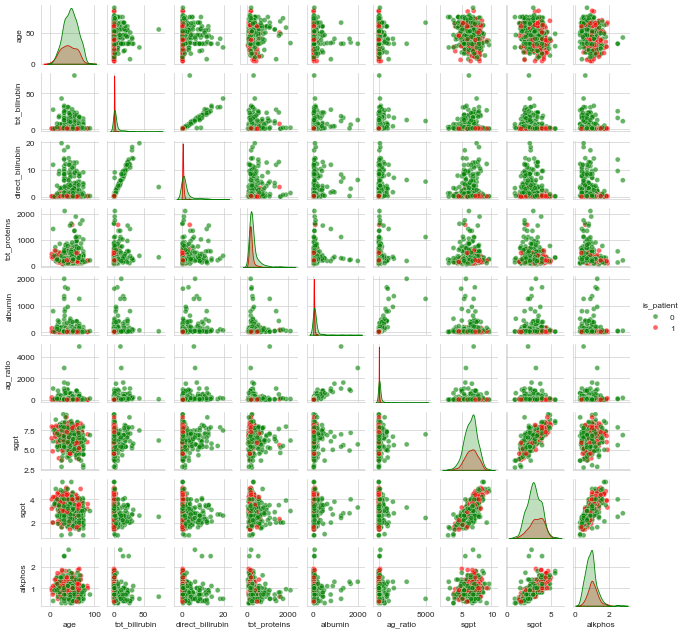

In [21]:
g = sns.pairplot(df.drop(columns=['gender_Female']), # Drop gender column
                 hue='is_patient', palette={0: 'green', 1: 'red'},  # Have the colouring correspond to diagnosis
                 height=1.2, plot_kws={'alpha':0.6}) # Specify height, and set 60% transparency between classes
                                                     # so that overlap is easily visible.

g.figure.set_dpi(60) # Set the resolution of the figure to 60 dots per inch.

plt.show() # Display the plot

## 8. Feature Scaling and Comparison

Features often have different scales. Look at the summary statistics above; `alkphos` ranges from 0.3 to 2.80, whereas `tot_proteins` goes from 63 to 2110. 

Some machine learning algorithms find it *difficult* to compare features that range over such different magnitudes. Features whose units are larger can swamp the predictive space and have a disproportionately, greater affect the predictions made by the algorithm. 

To combat this, we *rescale* the data so that all the features vary over the same range. In this example, we can use the `StandardScaler()` class imported from `scikit-learn` in order to do this. 

**Note**: There are other [scalers](https://scikit-learn.org/stable/modules/preprocessing.html#), each with their own advantages and disadvantages; you can learn more about them via scikit-learn's documentation. 

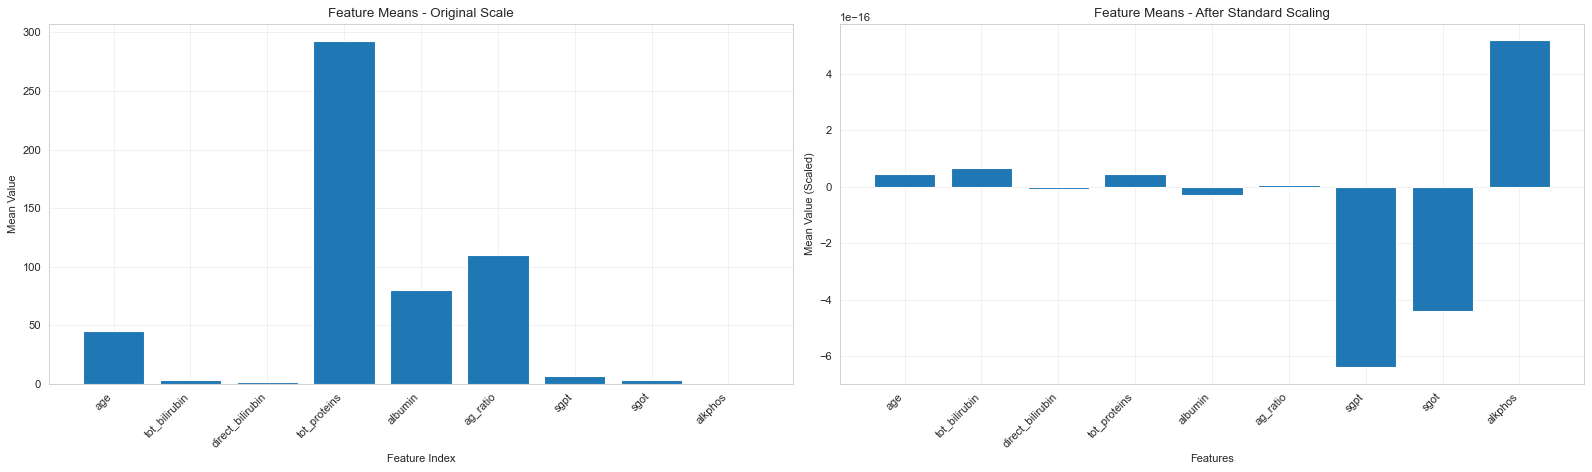

In [22]:
# Compare feature means before scaling
feature_means = df_features.mean()

# Make a single figure that will hold and display two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=80)

# Original scale
ax1.bar(range(len(feature_means)), feature_means.values)
ax1.set_xlabel('Feature Index')
ax1.set_ylabel('Mean Value')
ax1.set_title('Feature Means - Original Scale')
ax1.xaxis.set_ticks(np.arange(len(df_features.columns)))
ax1.set_xticklabels(df_features.columns, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Apply robust scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
scaled_means = pd.DataFrame(scaled_features).describe().loc['mean']

# Scaled features
ax2.bar(df_features.columns, scaled_means)
ax2.set_xlabel('Features')
ax2.set_ylabel('Mean Value (Scaled)')
ax2.set_title('Feature Means - After Standard Scaling')
ax2.xaxis.set_ticks(np.arange(len(df_features.columns)))
ax2.set_xticklabels(df_features.columns, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

*HINT: To truly see the differences between scaled and unscaled features, look at the values on the y-axes of each plot.*

Once we are happy with our scaled data, we can overwrite the original DataFrame values with the newly-scaled features:

In [23]:
# Add our new scaled data back to the DataFrame

df[df_features.columns] = scaled_features

And get a snapshot of our summary statistics now, using the `.describe()` method. Note, we've been lazy, and haven't removed the target variable or gender, here - ignore them. In fact, leaving them in explains why we removed them, above (having a patient who is 0.42% male isn't meaningful information).

In [ ]:
# Summary statistics

df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female
count,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,566.000000,566.000000
mean,4.393816e-17,6.590723e-17,-9.415319e-18,4.393816e-17,-3.138440e-17,6.276879e-18,-6.402417e-16,-4.393816e-16,5.178425e-16,0.286219,0.243816
std,1.000885e+00,1.000885e+00,1.000885e+00,1.000885e+00,1.000885e+00,1.000885e+00,1.000885e+00,1.000885e+00,1.000885e+00,0.452393,0.429763
min,-2.514492e+00,-4.678855e-01,-4.951896e-01,-9.342662e-01,-3.856475e-01,-3.425848e-01,-3.492591e+00,-2.824483e+00,-2.029114e+00,0.000000,0.000000
25%,-7.310303e-01,-4.042031e-01,-4.599657e-01,-4.743916e-01,-3.141734e-01,-2.911416e-01,-6.395251e-01,-6.862317e-01,-7.765814e-01,0.000000,0.000000
50%,6.953915e-03,-3.723619e-01,-4.247417e-01,-3.441617e-01,-2.481973e-01,-2.362689e-01,9.674992e-02,-5.733413e-02,6.251599e-03,0.000000,0.000000
75%,8.064368e-01,-1.176324e-01,-7.250169e-02,2.211004e-02,-1.066235e-01,-7.850989e-02,6.489562e-01,8.231225e-01,4.759514e-01,1.000000,0.000000
max,2.774395e+00,1.140888e+01,6.408714e+00,7.396381e+00,1.055539e+01,1.652734e+01,2.857781e+00,2.961374e+00,5.799215e+00,1.000000,1.000000


And finally, a glance at our DataFrame, now that we have done our data exploration and pre-processing:

In [ ]:
# View DataFrame

df

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female
0,1.236928,-0.420124,-0.495190,-0.429625,-0.352659,-0.315148,0.280819,0.194225,-0.150315,0,1
1,1.052432,1.203777,1.406906,1.654054,-0.088755,-0.033926,0.925059,0.068445,-0.651328,0,0
2,1.052432,0.630636,0.913770,0.803490,-0.110747,-0.143671,0.464887,0.194225,-0.181628,0,0
3,0.806437,-0.372362,-0.389518,-0.449974,-0.363655,-0.308289,0.280819,0.320004,0.162818,0,0
4,1.667418,0.089335,0.174066,-0.397068,-0.292181,-0.174537,0.740991,-0.937791,-1.715981,0,0
...,...,...,...,...,...,...,...,...,...,...,...
561,0.929434,-0.451965,-0.495190,0.844187,-0.330667,-0.260276,-0.547491,-1.944027,-1.809921,1,0
562,-0.300540,-0.436044,-0.495190,-0.791827,-0.248197,-0.270564,-0.455456,0.068445,0.475951,0,0
563,0.437445,-0.404203,-0.459966,-0.193583,-0.176723,-0.208833,-0.087319,0.068445,0.162818,0,0
564,-0.854028,-0.324600,-0.354294,-0.441834,-0.281185,-0.267135,0.280819,0.320004,0.162818,0,0


Once we are happy with the data, and are ready to move onto our machine learning analyses, let's save the pre-processed DataFrame to a CSV file, using Pandas' `.to_csv()` method.

In [ ]:
# Save DataFrame as CSV file

df.to_csv('liver_augmented.csv', index=False)

In the next notebook, we'll start to perform some modelling using classical machine learning methods.